# Exercise 1 - "The dress" 

![](https://upload.wikimedia.org/wikipedia/en/a/a8/The_Dress_%28viral_phenomenon%29.png)

In this exercise, the goal is to understand why the entire Internet in 2015 was set ablaze by "the dress" that seemed to be coloured black and royal blue, or white and gold. ([The designer states it is black and royal blue](https://www.independent.co.uk/news/uk/home-news/the-dress-roman-originals-cofounder-peter-christodoulou-says-viral-image-leaves-company-sitting-pretty-a6715786.html).) In particular, we're going to explore different techniques of image normalization across color as well as manipulating an image's brightness and contrast to identify different patterns within the image.

## a

Color normalization is done by looking at the Red-Green-Blue (RGB) values for a single pixel. Thus, given a pixel located at $x \times y$, the image color would be determined by: 

$$\mathrm{ImageColor}(x, y) = (R, G, B)$$

Normalizing the color for a single pixel involves obtaining the total at the specific location and, then, dividing by the total times the maximum pixel value. In particular, we have:

$$
\begin{align*}
\mathrm{Total} &= R + G + B \\
R' &= \dfrac{R}{\mathrm{Total}} \times 255 \\
G' &= \dfrac{G}{\mathrm{Total}} \times 255 \\
B' &= \dfrac{B}{\mathrm{Total}} \times 255 \\
\mathrm{ImageColorNormalized}(x, y) &= (R', G', B')
\end{align*}
$$

**Hints:** 

- Recall that obtaining a single "slice" or color channel with a NumPy array can be done by `object[:, :, 0]` (giving the "R" color).
  - Multiple slices can be obtained by `object[:, :, 0:2]` (giving R and G channels).
- Consider using the [`axis=` parameter in `np.sum()`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) to allow for the summation of different dimensions. 
- Lastly, depending on the image, the number of color channels may range from 1 (black and white) to 4 (red, green, blue, alpha).

In [5]:
#@title <-- Run Me! Load image from Wikipedia
import numpy as np
import matplotlib.pyplot as plt
import requests
import imageio
from PIL import Image

# Load Dress
img_dress = imageio.imread(
    'https://upload.wikimedia.org/wikipedia/en/2/21/The_dress_blueblackwhitegold.jpg'
  )

# Note there are 4 color channels (R, G, B, A)
print(f"Dimensions of the Image: {img_dress.shape}")

Dimensions of the Image: (389, 256, 3)


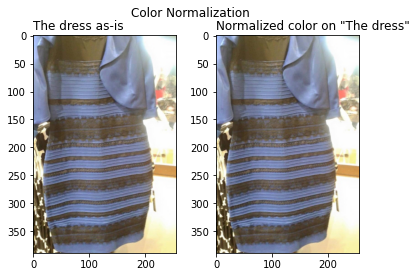

In [6]:
# Retrieve pixels
img_rgb_pixels = np.array(img_dress, copy = True)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Color Normalization')
ax1.set_title(f'The dress as-is', loc = "left")
ax1.imshow(img_dress)

# ... code here ...

# modify values in img_rgb_pixels

# ... end code ... 

# Graph the normalized image
img_dress_normalized = Image.fromarray(img_rgb_pixels)
ax2.set_title(f'Normalized color on "The dress"', loc = "left")
ax2.imshow(img_dress_normalized)
plt.show()

## b

After normalizing by color, the detection will improve when applying CNNs. Notwithstanding though, the human eye might still be missing a few hidden factors.

Another technique is to modify an image's constrast and brightness. This type of modification is done through a linear method using absolute value. Specifically, we have:

$$
\begin{align*}
\mathrm{BrightnessAndContrast}(x, y; \alpha, \beta) &= \left| \alpha \mathrm{ImageColorNormalized}(x, y) + \beta \right|
\end{align*}
$$

where $\alpha$ controls the image contrast, $\beta$ handles the brightness, and $\left| \cdots \right|$ represents the absolute value operation.

Experiment with different values for $\alpha$ and $\beta$ until the image shows clear sections on the dress.

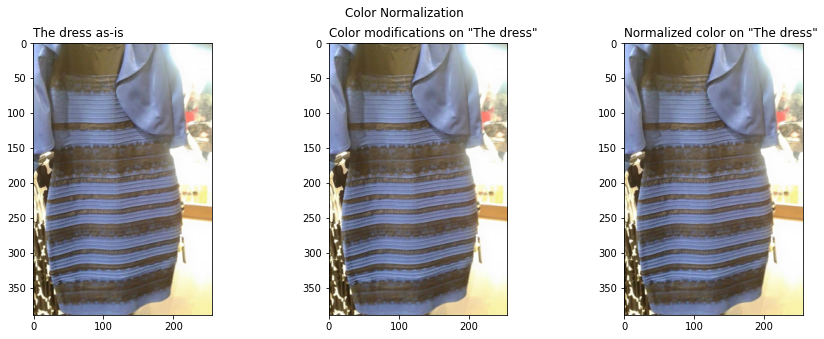

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))
fig.suptitle('Color Normalization')
ax1.set_title(f'The dress as-is', loc = "left")
ax1.imshow(img_dress)

contrast_pixels = np.array(img_dress, copy = True)

# ... code here ...

# modify values in contrast_pixels


# ... end code ... 

# Graph the image with color and normalization
img_dress_contrast = Image.fromarray(contrast_pixels)
ax2.set_title(f'Color modifications on "The dress"', loc = "left")
ax2.imshow(img_dress_contrast)

ax3.set_title(f'Normalized color on "The dress"', loc = "left")
ax3.imshow(img_dress_normalized)
plt.show()

## c

Experiment with different values of $\alpha$ and $\beta$ values in **Exercise 1: b**. What happens to the image under contrast and brightness?


... answer here ... 

# Exercise 2: Reshaping Data

Reshaping data is a common requirement for working with neural networks. Previously, the assumption about data in neural networks
was that there is exactly _one_ example or image. In practice, there needs to
be a large amount of data for the neural network to function. Previously, $X$ was defined to be a single input vector: 

$$
X_{m \times 1} = \begin{bmatrix}
\vert \\
X^{(1)}  \\
\vert  \\
\end{bmatrix}_{m \times 1}
$$

To enable multiple training examples, let's define $X$ to be:

$$
X_{m \times n_e} = \begin{bmatrix}
\vert & \vert & \vert \\
X^{(1)} & X^{(2)} & X^{(3)} \\
\vert & \vert & \vert \\
\end{bmatrix}_{m \times n_e}
$$

where $m$ is the number of inputs and $n_e$ is the number of observations. Therefore, the linear combinations in $Z^{[1]}$ would now look like:

$$
Z^{[1]} = \begin{bmatrix}
\vert & \vert & \vert \\
Z^{[1](1)} & Z^{[1](2)} & Z^{[1](3)} \\
\vert & \vert & \vert \\
\end{bmatrix}_{n_h \times n_e}
$$

Let the parentheses -- $[]$ -- denote the layer number and the square brackets
-- $()$ -- be the training data example.

## a

Having said this, please reshape the MNIST training data from:

$$\text{Examples }\times \text{Height } \times \text{Width }$$

To being shaped as:

$$\underbrace{\left(\text{Height } \cdot \text{Width }\right)}_{=m} \times \underbrace{\text{Examples }}_{=n_e}$$

where $m$ is the number of features and $n_e$ represents the number of observations.


Through this process, the data is being flattened:

$$\underbrace{\left(\text{Height } \cdot \text{Width }\right)}_{=m}$$

Therefore, we will have $m$ different pixels acting as features for the model.

_Hints:_

- Changing a data's shape is possible with [`np.reshape(data, (data.shape[0], -1))`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape) and [`np.reshape(data, (-1, data.shape[0]))`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html#numpy.reshape).
  - **Note:** `-1` denotes an unknown dimension and requests that NumPy determine it during the reshape. 
- Arrays can be transposed with [`data.T`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html)



We'll acess the MNIST Fashion data using TensorFlow's dataset module:

In [15]:
%%capture
import tensorflow as tf

# Import data
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load the MNIST data via a helper
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Perform scaling
x_train, x_test = x_train / 255.0, x_test / 255.0 # [0, 255] -> [0, 1]

With the data in hand, we must begin the process of reshaping it. 

In [16]:
import numpy as np

# code here 

# data should be reshaped

x_train_reshaped = x_train
x_test_reshaped = x_test

# Display helper:
print(f'X Train Reshapped has dimensions: {x_train_reshaped.shape}')
print(f'X Test Reshapped has dimensions: {x_test_reshaped.shape}')

X Train Reshapped has dimensions: (60000, 28, 28)
X Test Reshapped has dimensions: (10000, 28, 28)


#### Aside: Data reshaping 

Having trouble re-organizing the data? Try modifying a smaller example case first. **This is intended to allow exploration of how data changes in a minimal example.**

In [17]:
# Not graded code, acts a small test case
import numpy as np
a = np.arange(24).reshape((4, 3, 2))
print(f"Contents of `a` before transform:\n {a}\n")
print(f"Dimensions of `a` before transform:\n {a.shape}\n")

# This is just is a direct implementation of the hint. 
a2 = np.reshape(a, (-1, a.shape[0]))
print(f"Contents of `a2` after transform:\n {a2}\n")
print(f"Dimensions of `a2`:\n {a2.shape}\n")

# Use this line of code for reshaping x 
a3 = np.reshape(a, (a.shape[0], -1)).T
print(f"Contents of `a3` after transform:\n {a3}\n")
print(f"Dimensions of `a3`:\n {a3.shape}\n")

b = np.arange(3)
print(f"Contents of `b`:\n {b}\n")
print(f"Dimensions of `b`:\n {b.shape}\n")

Contents of `a` before transform:
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]

Dimensions of `a` before transform:
 (4, 3, 2)

Contents of `a2` after transform:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]

Dimensions of `a2`:
 (6, 4)

Contents of `a3` after transform:
 [[ 0  6 12 18]
 [ 1  7 13 19]
 [ 2  8 14 20]
 [ 3  9 15 21]
 [ 4 10 16 22]
 [ 5 11 17 23]]

Dimensions of `a3`:
 (6, 4)

Contents of `b`:
 [0 1 2]

Dimensions of `b`:
 (3,)



**Note:** This is no exercise **2b** for this problem

# Exercise 3: Housing Bubble


In this problem, we'll be looking at California Housing Data from the 1990 census. The objective is to determine whether or not a house's value is above the median for a given neighborhood given the following:

**Predictors**

- **longitude**:Geographic coordinate that specifies the west-east position
- **latitude**: Geographic coordinate that specifies the north–south position
- **housing_median_age**:	Median age of a house within a block; a lower number is a - newer building	
- **total_rooms**:	Total number of rooms within a block	
- **total_bedrooms**:	Total number of bedrooms within a block	
- **population**:	Total number of people residing within a block	
- **households**:	Total number of households, a group of people residing within a home unit, for a block	
- **median_income**:	Median income for households within a block of houses (measured in tens of thousands of US Dollars)	

**Target**

- **aboveMedianValue**: The house's median value is above the value for the neighborhood.

To speed up the process, we've already imported the data.

In [18]:
#@title (Hidden) Library and Data Importation steps
## List Libraries Data ---- 

import numpy as np
import pandas as pd

## Import Data ---- 

# Download training data
df_train_org = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
df_test_org = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

df_data = pd.concat([df_train_org, df_test_org], ignore_index=True)

price_threshold = 265000
df_data["aboveMedianValue"] = (df_data["median_house_value"] > price_threshold).astype(float)

# Set the labels
df_x_data = df_data.loc[:, [not var in ["longitude","latitude", "median_house_value", "aboveMedianValue"] for var in df_data.columns]]
df_y_data = df_data["aboveMedianValue"]


This data importation step will create `df_x_data` and `df_y_data` that contains the following information:

In [19]:
df_x_data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,17.0,720.0,174.0,333.0,117.0,1.6509
3,14.0,1501.0,337.0,515.0,226.0,3.1917
4,20.0,1454.0,326.0,624.0,262.0,1.9250


In [20]:
df_y_data.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: aboveMedianValue, dtype: float64

**Note:** `df_data` contains the latitude and longitude columns if you want to look up a specific house.

## a

Normalize the data in `df_x_data` by applying a z-score transformation to each column.

$$
Z = \frac{X - \text{mean}(X)}{\text{stdev}(X)}
$$


In [21]:
# code here

## b

Construct a training and test data set from `df_x_data` and `df_y_data` called by performing the 80%/20% split. Make sure to randomize the indices prior to splitting the data. 

- **Training**
  - `x_train`: Predictors in the training set
  - `y_train`: Outcome associated with predictors in the training set
- **Test**
  - `x_test`: Predictors in the test set.
  - `y_test`: Outcome associated with predictors in the test set.

In [22]:
## Train/Test Split (80/20) ---- 

In [23]:
## Display shape information ----
print(f"Training data set dimensions:\n `x_train` = {x_train.shape} and `y_train` = {y_train.shape}")
print(f"Test data set dimensions:\n `x_test` = {x_test.shape} and `y_test` = {y_test.shape}")

Training data set dimensions:
 `x_train` = (60000, 28, 28) and `y_train` = (60000,)
Test data set dimensions:
 `x_test` = (10000, 28, 28) and `y_test` = (10000,)


## c

Write a **function** that will return Keras' sequential model pre-configured with the following layers:

- **Input Layer**
  - **Shape:** (6, )
- **Hidden/Dense Layer 1** 
  - **Neurons:** 25
  - **Activation:** ReLU
- **Hidden/Dense Layer 2** 
  - **Neurons:** 20
  - **Activation:** ReLU
- **Output/Dense Layer 3**
  - **Neurons:** 1
  - **Activation:** Linear

As the data only has two categories, the cost function will be the binary cross-entropy given by:

$$J(\mathbf{W}, \mathbf{b}) = \frac{1}{n} \sum_{i = 1}^{N}\left[y_i \log(\hat y_i) + (1 - y_i)\log(1 - \hat y_i) \right]$$

This can be specified as [`loss=tf.keras.losses.binary_crossentropy( from_logits=True)`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/binary_crossentropy) inside of [`model.compile()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile).

Compile the model under:

- the binary cross-entropy loss/cost function with `logits = True`. 
- the accuracy metric





**Implementation Guidelines**

- **Arguments:**
  - `optimizer`: A string that contains either: 
    - [`SGD`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD), e.g. `optimizer='sgd'`
    - [`RMSprop`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop), e.g. `optimizer='rmsprop'`
    - [`ADAM`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam), e.g. `optimizer='adam'`
- **Return:**
  - `model`: A keras sequential model configured to the above layer specification.

**Helpful references:**

- [`keras.Sequential([layers.Dense(), layers.Dense(), ... ])`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)
  - [Sequential Layers Guide](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)
- [`layers.Dense(n_neurons_in_layer, activation = "identity")`](https://www.tensorflow.org/guide/keras/sequential_model#creating_a_sequential_model) 


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## code here

## d

Using **c** construct a model under **SGD** optimizer with **10 epochs** using a variety of batch sample sizes: 

- `batch_size` = 1
- `batch_size` = 64
- `batch_size` = 16076

Ensure that the validation data is given the [`model.fit()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) call as 
`validation_data = (x_test, y_test)`.

In [25]:
## code here

## e

Construct graphs for each training and test evaluation session. 

For each graph, determine if there is a training issue present. Moreover, describe any difference between the optimization routines.

In [26]:
import matplotlib.pyplot as plt

# Construct a re-usable function to display Keras model training results
def generic_training_plot(training_history, test_history,
                          y_label = 'loss', x_label = 'Epoch', 
                          graph_title = "Loss", legend_location = 'upper right'):

  # Retrieve the information from the fit model object
  plt.plot(training_history)
  plt.plot(test_history)

  # Clean up the graph
  plt.title(graph_title)
  plt.ylabel(y_label)
  plt.xlabel(x_label)
  plt.legend(['Train', 'Test'], loc = legend_location)
  # Display
  plt.show()


# Graph the loss from a keras model fit object
def plot_loss(model_history, graph_title = "Loss"):

  generic_training_plot(model_history.history['loss'],
                        model_history.history['val_loss'],
                        y_label = 'Loss',
                        graph_title = graph_title,
                        legend_location = 'upper right')

# Graph the accuracy from a keras model fit object
def plot_accuracy(model_history, graph_title = "Accuracy"):

  generic_training_plot(model_history.history['acc'],
                        model_history.history['val_acc'],
                        y_label = 'Accuracy',
                        graph_title = graph_title,
                        legend_location = 'lower right')

## Sample function usage
#plot_loss(fit_model_1, title="Understanding Loss under SGD")
#plot_accuracy(fit_model_1, title="Understanding Accuracy under SGD")